In [2]:
import json
from pathlib import Path

# Path to your original slice file
file_path = Path(r"/Users/iben/Desktop/Social_graphs/project_data/mpd.slice.1000-1999.json")

# Load the full slice
with open(file_path, 'r', encoding='utf-8') as f:
    mpd_slice = json.load(f)

# Check how many playlists are inside
print(f"Total playlists in this slice: {len(mpd_slice['playlists'])}")

# Pick one playlist (for example the first one)
playlist = mpd_slice["playlists"][10]   # or e.g. [42] for the 43rd playlist

# Path to the new file where you want to save it
save_path = Path(r"/Users/iben/Desktop/Social_graphs/project_data/single_playlist.json")

artists = []

for i, track in enumerate(playlist["tracks"]):
    artist_name = track['artist_name']
    if artist_name not in artists:
        artists.append(artist_name)
print(f"\nTotal unique artists in the playlist: {len(artists)}")
print("Artists:")
for artist in artists:
    print(f" - {artist}")

Total playlists in this slice: 1000

Total unique artists in the playlist: 63
Artists:
 - Christina Aguilera
 - Natasha Bedingfield
 - A Tribe Called Quest
 - TLC
 - The Killers
 - MGMT
 - Kygo
 - Marvin Gaye
 - Stevie Wonder
 - Van Morrison
 - Redbone
 - The Jackson 5
 - The Black Eyed Peas
 - Mark Ronson
 - DJ Kool
 - Tag Team
 - Frankie Valli & The Four Seasons
 - Jamiroquai
 - O.A.R.
 - Afroman
 - Blues Image
 - Chance The Rapper
 - Antiserum
 - Beyoncé
 - a-ha
 - Earth, Wind & Fire
 - Backstreet Boys
 - House Of Pain
 - Sérgio Mendes
 - Shaggy
 - Missy Elliott
 - Snoop Dogg
 - Warren G
 - KC & The Sunshine Band
 - Disclosure
 - Estelle
 - Duran Duran
 - Gwen Stefani
 - Justin Timberlake
 - Shakira
 - Don Omar
 - Daryl Hall & John Oates
 - Brother Ali
 - Journey
 - Vanilla Ice
 - Blackstreet
 - JAY Z
 - Cam’ron
 - *NSYNC
 - Blue Swede
 - OMI
 - The Chainsmokers
 - Macklemore
 - LFO
 - The Verve
 - Third Eye Blind
 - Young Gunz
 - Whigfield
 - Elton John
 - Nappy Roots
 - Dexys Midn

In [3]:
# print all tracks in the playlist
first_10_tracks = []
print("\nTracks in the playlist:")
for i, track in enumerate(playlist["tracks"]):
    if i < 10:
        print(f"   {i+1:3d} {track['track_name']} - {track['album_name']} - {track['artist_name']}")
        first_10_tracks.append(track['track_name'])
    else:
        break




Tracks in the playlist:
     1 Ain't No Other Man - Keeps Gettin' Better: A Decade Of Hits - Christina Aguilera
     2 Unwritten - Unwritten - Natasha Bedingfield
     3 Scenario - LP Mix - The Low End Theory - A Tribe Called Quest
     4 Waterfalls - Crazysexycool - TLC
     5 Mr. Brightside - Hot Fuss - The Killers
     6 Pocketful of Sunshine - Strip Me Away - Natasha Bedingfield
     7 Time to Pretend - Oracular Spectacular/Congratulations - MGMT
     8 Stole the Show - Cloud Nine - Kygo
     9 Sexual Healing - Kygo Remix - Sexual Healing - Marvin Gaye
    10 For Once In My Life - For Once In My Life - Stevie Wonder


In [4]:
import lyricsgenius
import os
import re
from pathlib import Path

# --- 1. SETUP GENIUS API ---
GENIUS_ACCESS_TOKEN = "IKoqZN1ANyU_2G6zmTPF2xlaH2OlIEEUlDoD97Mo9-P_A6-2QgnSoQlwsJ3Hy3DY"  # <--- paste your token

# Initialize Genius client
genius = lyricsgenius.Genius(
    GENIUS_ACCESS_TOKEN,
    remove_section_headers=True,   # cleans up [Verse], etc.
    timeout=15,
    retries=3
)

# --- 2. SETUP FOLDERS AND TRACKS ---
# Use your playlist’s first 10 tracks (assuming variable 'playlist' already exists)
tracks_to_download = [
    {"title": t["track_name"], "artist": t["artist_name"]}
    for t in playlist["tracks"][:10]
]

# Folder to save lyrics
save_folder = Path(
    r"/Users/iben/Desktop/Social_graphs/lyrics"
)
save_folder.mkdir(parents=True, exist_ok=True)

# --- 3. LOOP THROUGH SONGS AND SAVE LYRICS ---
for song_info in tracks_to_download:
    title = song_info["title"]
    artist = song_info["artist"]

    print(f"\nSearching for '{title}' by {artist}...")

    try:
        song = genius.search_song(title, artist)
        if song and song.lyrics:
            # Clean up lyrics
            lyrics = re.sub(r'\d*Embed$', '', song.lyrics).strip()

            # Make a safe filename: replace forbidden chars and spaces with "_"
            safe_title = re.sub(r'[\\/*?:"<>|]', "_", title)
            safe_title = safe_title.replace(" ", "_")
            filename = save_folder / f"{safe_title}.txt"

            # Save lyrics
            with open(filename, "w", encoding="utf-8") as f:
                # if it already exists, we overwrite
                
                f.write(lyrics)

            print(f"  ✅ Saved lyrics to: {filename.name}")

        else:
            print(f"  ⚠️  No lyrics found for '{title}'.")

    except Exception as e:
        print(f"  ❌ Error fetching '{title}': {e}")

    # Optional: pause to avoid rate limits
    #time.sleep(1)

print("\n--- Done saving lyrics ---")


Searching for 'Ain't No Other Man' by Christina Aguilera...
Searching for "Ain't No Other Man" by Christina Aguilera...
Done.
  ✅ Saved lyrics to: Ain't_No_Other_Man.txt

Searching for 'Unwritten' by Natasha Bedingfield...
Searching for "Unwritten" by Natasha Bedingfield...
Done.
  ✅ Saved lyrics to: Unwritten.txt

Searching for 'Scenario - LP Mix' by A Tribe Called Quest...
Searching for "Scenario - LP Mix" by A Tribe Called Quest...
No results found for: 'Scenario - LP Mix A Tribe Called Quest'
  ⚠️  No lyrics found for 'Scenario - LP Mix'.

Searching for 'Waterfalls' by TLC...
Searching for "Waterfalls" by TLC...
Done.
  ✅ Saved lyrics to: Waterfalls.txt

Searching for 'Mr. Brightside' by The Killers...
Searching for "Mr. Brightside" by The Killers...
Done.
  ✅ Saved lyrics to: Mr._Brightside.txt

Searching for 'Pocketful of Sunshine' by Natasha Bedingfield...
Searching for "Pocketful of Sunshine" by Natasha Bedingfield...
Done.
  ✅ Saved lyrics to: Pocketful_of_Sunshine.txt

Searc

Make a network of artists and make an edge if they are on one or more playlst together. Edge weights should be the number of playlists the artist share.

In [5]:
# Make a network of artists and make an edge if they are on one or more playlst together. Edge weights should be the number of playlists the artist share.
import networkx as nx

G = nx.Graph()

# Data
data_dir = Path(r"/Users/iben/Desktop/Social_graphs/project_data")

# Define which files to use (first 5 slices)
#slice_files = [f"mpd.slice.{i*1000}-{i*1000+999}.json" for i in range(5)]
slice_files = list(data_dir.glob("mpd.slice.*.json"))
used_playlists = 0


# Load nodes and edges
for slice_file in slice_files:
    with open(slice_file, 'r', encoding='utf-8') as f:
        mpd_slice = json.load(f)

    for playlist in mpd_slice["playlists"]:

        # skip playlist if it has less than 50 
        if playlist["num_tracks"] < 40 or playlist["num_tracks"] > 100:
            continue
        # skip if the playlist has less than 6 artists
        if len(set(track['artist_name'] for track in playlist["tracks"])) < 6:
            continue

        used_playlists += 1

        artists_in_playlist = set()
        for track in playlist["tracks"]:
            artist_name = track['artist_name']
            artists_in_playlist.add(artist_name)
            if not G.has_node(artist_name):
                G.add_node(artist_name)

        # Create edges between all pairs of artists in the same playlist
        artists_list = list(artists_in_playlist)
        for i in range(len(artists_list)):
            for j in range(i + 1, len(artists_list)):
                artist_a = artists_list[i]
                artist_b = artists_list[j]
                if G.has_edge(artist_a, artist_b):
                    G[artist_a][artist_b]['weight'] += 1
                else:
                    G.add_edge(artist_a, artist_b, weight=1)

# print number of nodes and edges
print(f"Total artists (nodes): {G.number_of_nodes()}")
print(f"Total connections (edges): {G.number_of_edges()}")
print(f"Total used playlists: {used_playlists}")

KeyboardInterrupt: 

In [ ]:
# print number of unique artists
unique_artists = list(G.nodes)
print(f"Total unique artists: {len(unique_artists)}")


# print highest degree artists
degree_dict = dict(G.degree())

# print highest edge weight connections
edge_weights = nx.get_edge_attributes(G, 'weight')
sorted_edges = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 strongest connections between artists:")
for (artist_a, artist_b), weight in sorted_edges[:10]:
    print(f" - {artist_a} <--> {artist_b}: {weight} shared playlists")

print("\nTop 10 artists by number of connections:")
sorted_degrees = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)
for artist, degree in sorted_degrees[:10]:
    print(f" - {artist}: {degree} connections")



Total unique artists: 15527

Top 10 strongest connections between artists:
 - Drake <--> Kanye West: 219 shared playlists
 - Kendrick Lamar <--> Drake: 201 shared playlists
 - Drake <--> Rihanna: 178 shared playlists
 - Drake <--> Future: 175 shared playlists
 - The Weeknd <--> Drake: 174 shared playlists
 - Big Sean <--> Drake: 174 shared playlists
 - Kendrick Lamar <--> Kanye West: 155 shared playlists
 - Drake <--> J. Cole: 150 shared playlists
 - Drake <--> Post Malone: 149 shared playlists
 - Drake <--> Rae Sremmurd: 140 shared playlists

Top 10 artists by number of connections:
 - Drake: 3830 connections
 - Rihanna: 3497 connections
 - Coldplay: 3416 connections
 - Kanye West: 3371 connections
 - The Weeknd: 3244 connections
 - Ed Sheeran: 3222 connections
 - Calvin Harris: 3221 connections
 - The Chainsmokers: 3172 connections
 - Kendrick Lamar: 3114 connections
 - Imagine Dragons: 3039 connections


In [ ]:
# get the GCC of the network
gcc = max(nx.connected_components(G), key=len)
G_gcc = G.subgraph(gcc).copy()
print(f"GCC has {G_gcc.number_of_nodes()} nodes and {G_gcc.number_of_edges()} edges.")

GCC has 15479 nodes and 1228115 edges.


In [ ]:
# Make backbone using disparity filter

# Disparity Filter method, using edge weights.
def disparity_filter(G, alpha=0.05, weight='weight'):
    backbone = nx.Graph()
    for node in G.nodes():
        k = G.degree(node)
        if k > 1:
            sum_w = sum([G[node][nbr][weight] for nbr in G.neighbors(node)]) # sum of weights
            for nbr in G.neighbors(node):
                p_ij = G[node][nbr][weight] / sum_w # proportion of weight
                alpha_ij = (1 - p_ij) ** (k - 1) # significance level
                if alpha_ij < alpha: 
                    backbone.add_edge(node, nbr, weight=G[node][nbr][weight])
                    # add all atributes of the node and edge to the backbone
                    for attr, value in G.nodes[node].items():
                        backbone.nodes[node][attr] = value
                    for attr, value in G.nodes[nbr].items():
                        backbone.nodes[nbr][attr] = value
                    for attr, value in G[nbr][node].items():
                        backbone[nbr][node][attr] = value
    return backbone


G_backbone = disparity_filter(G_gcc, alpha=0.05)
print(f"Backbone has {G_backbone.number_of_nodes()} nodes and {G_backbone.number_of_edges()} edges.")



Backbone has 2572 nodes and 43641 edges.


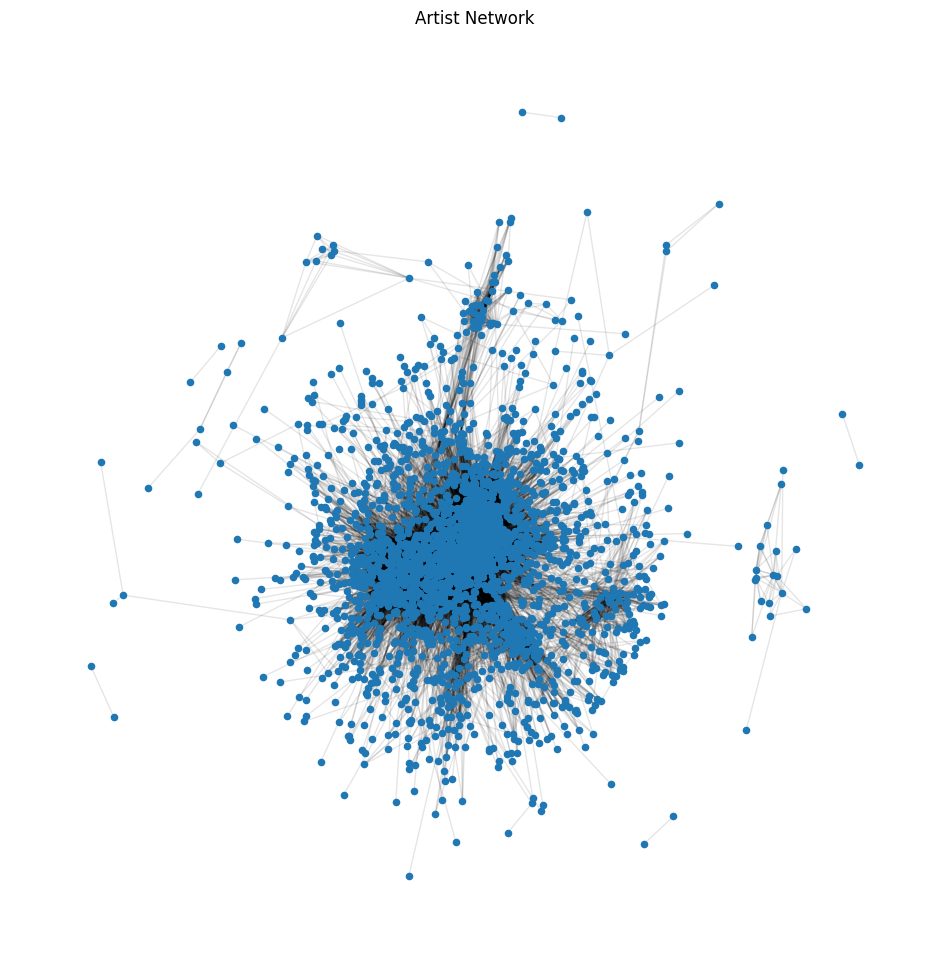

In [ ]:
# plot the network
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_backbone, k=0.1)  # positions for all nodes
nx.draw_networkx_nodes(G_backbone, pos, node_size=20)
nx.draw_networkx_edges(G_backbone, pos, alpha=0.1)
plt.title("Artist Network")
plt.axis('off')
plt.show()


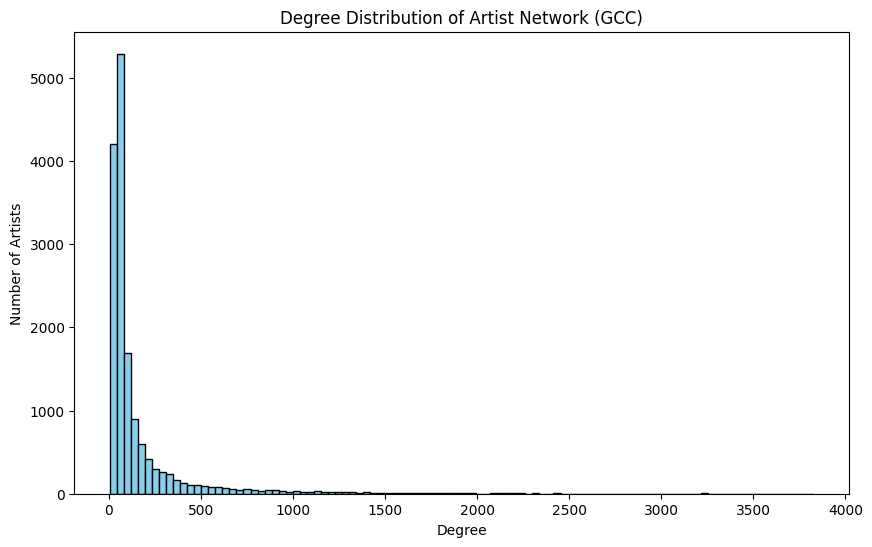

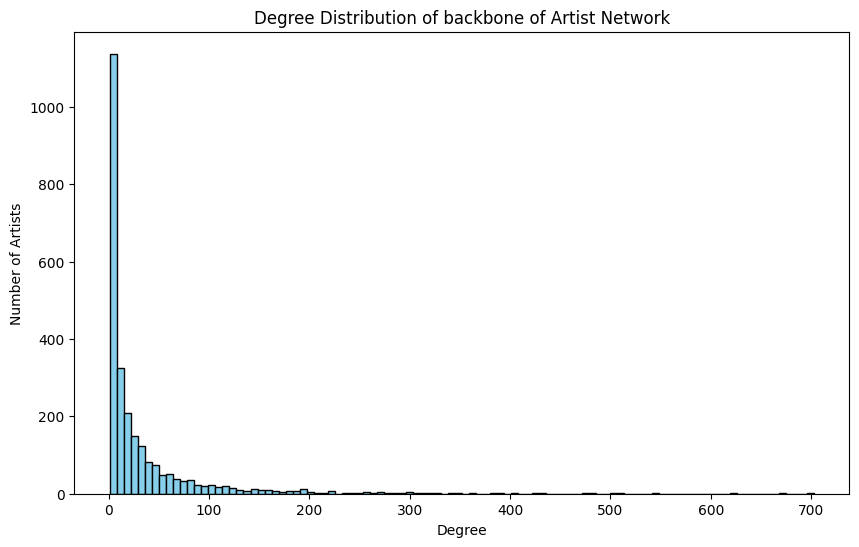

In [ ]:
# make a histogram of the degree distribution
degrees_gcc = [degree for node, degree in G_gcc.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees_gcc, bins=100, color='skyblue', edgecolor='black')
plt.title("Degree Distribution of Artist Network (GCC)")
plt.xlabel("Degree")
plt.ylabel("Number of Artists")
plt.show()

# make a histogram of the degree distribution of the backbone
degrees_bb = [degree for node, degree in G_backbone.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees_bb, bins=100, color='skyblue', edgecolor='black')
plt.title("Degree Distribution of backbone of Artist Network")
plt.xlabel("Degree")
plt.ylabel("Number of Artists")
plt.show()

In [ ]:
# eigenvector centrality of the backbone
eigen_centrality = nx.eigenvector_centrality(G_backbone, max_iter=1000)
# print top 10 artists by eigenvector centrality
sorted_eigen = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 artists by eigenvector centrality:")
for artist, centrality in sorted_eigen[:10]:
    print(f" - {artist}: {centrality:.4f}")

# degree centrality of the backbone
degree_centrality = nx.degree_centrality(G_backbone)
# print top 10 artists by degree centrality
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 artists by degree centrality:")
for artist, centrality in sorted_degree[:10]:
    print(f" - {artist}: {centrality:.4f}")

# betweenness centrality of the backbone
betweenness_centrality = nx.betweenness_centrality(G_backbone)
# print top 10 artists by betweenness centrality
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 artists by betweenness centrality:")
for artist, centrality in sorted_betweenness[:10]:
    print(f" - {artist}: {centrality:.4f}")
    

# closeness centrality of the backbone
closeness_centrality = nx.closeness_centrality(G_backbone)
# print top 10 artists by closeness centrality
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 artists by closeness centrality:")
for artist, centrality in sorted_closeness[:10]:
    print(f" - {artist}: {centrality:.4f}")





Top 10 artists by eigenvector centrality:
 - Rihanna: 0.1370
 - Drake: 0.1367
 - Kanye West: 0.1287
 - The Weeknd: 0.1205
 - The Chainsmokers: 0.1204
 - Calvin Harris: 0.1164
 - Beyoncé: 0.1163
 - Ed Sheeran: 0.1092
 - Maroon 5: 0.1078
 - Justin Bieber: 0.1046

Top 10 artists by degree centrality:
 - Drake: 0.2734
 - Rihanna: 0.2598
 - Kanye West: 0.2419
 - The Chainsmokers: 0.2131
 - Ed Sheeran: 0.1984
 - Calvin Harris: 0.1968
 - Beyoncé: 0.1960
 - The Weeknd: 0.1953
 - Coldplay: 0.1871
 - Kendrick Lamar: 0.1851

Top 10 artists by betweenness centrality:
 - Drake: 0.0704
 - Rihanna: 0.0596
 - NEEDTOBREATHE: 0.0496
 - Kanye West: 0.0495
 - Ed Sheeran: 0.0489
 - Coldplay: 0.0461
 - The Chainsmokers: 0.0419
 - Kendrick Lamar: 0.0353
 - Beyoncé: 0.0295
 - Calvin Harris: 0.0288

Top 10 artists by closeness centrality:
 - Rihanna: 0.5325
 - Drake: 0.5210
 - Ed Sheeran: 0.5151
 - Kanye West: 0.5115
 - Coldplay: 0.5115
 - The Chainsmokers: 0.5057
 - The Weeknd: 0.5028
 - Beyoncé: 0.5017
 - M

1. Degree Centrality

Definition: Measures how many direct connections (edges) a node has.
Interpretation: A node with high degree centrality is well-connected and can quickly interact with many others.
Use Case: Identifying hubs in a network.


2. Eigenvector Centrality

Definition: Measures a node’s influence based on the importance of its neighbors. A node connected to highly influential nodes gets a higher score.
Concept: It’s like Google’s PageRank idea—connections to important nodes matter more.
Use Case: Finding influential nodes in social networks or citation networks.


3. Betweenness Centrality

Definition: Measures how often a node lies on the shortest paths between other nodes.
Interpretation: Nodes with high betweenness act as bridges or brokers.
Use Case: Identifying nodes that control information flow.


4. Closeness Centrality

Definition: Measures how close a node is to all other nodes in terms of shortest paths.
Interpretation: Nodes with high closeness can quickly reach others.
Use Case: Finding nodes that can efficiently spread information.

### LOUVAIN COMMUNITIES

In [ ]:
# using networkx louvain_communities to find communities
from matplotlib.patches import Patch

# GCC of backbone
gcc_G_backbone = max(nx.connected_components(G_backbone), key=len)
gcc_G_backbone = G_backbone.subgraph(gcc_G_backbone).copy()


louvain_communities = list(nx.community.louvain_communities(gcc_G_backbone, seed=11))
louvain_modularity = nx.community.modularity(gcc_G_backbone, louvain_communities)

# visualize the network using the Force Atlas algorithm with communities colored differently
# using louvain_communities
partition = {}
for i, community in enumerate(louvain_communities):
    for node in community:
        partition[node] = i

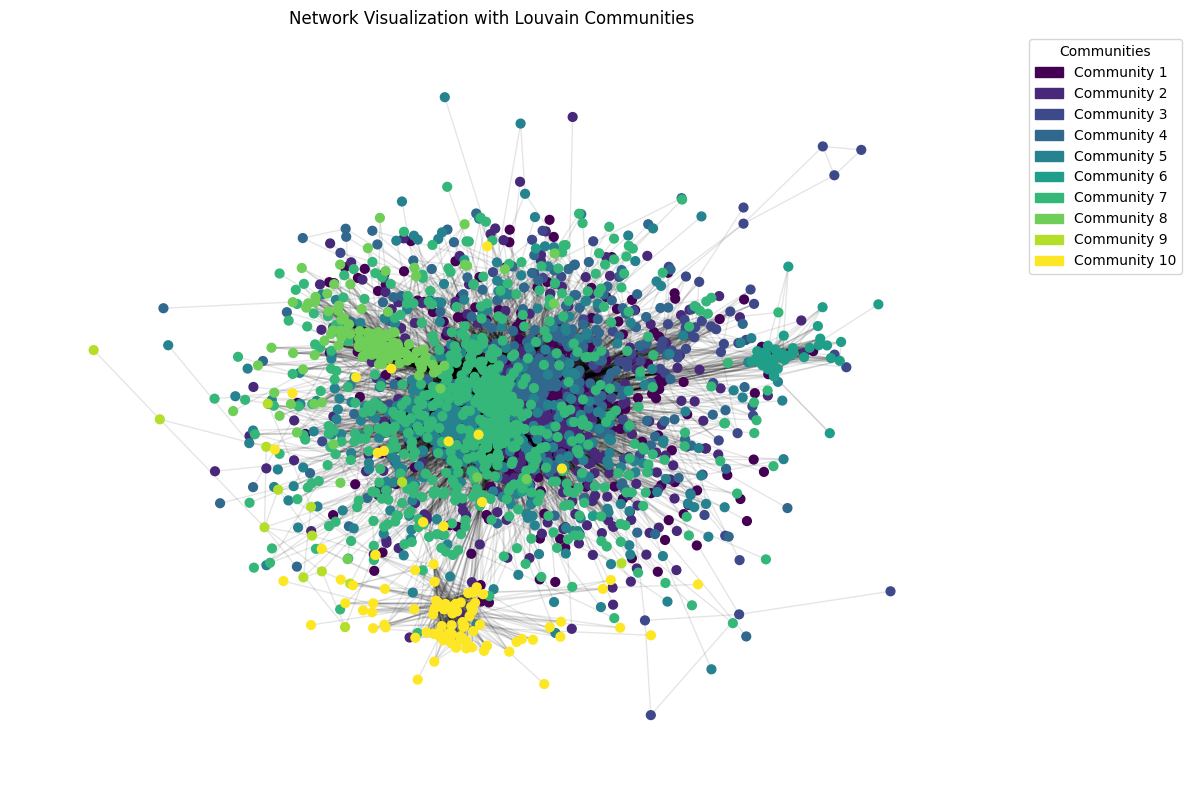


Louvain method found 10 communities with a modularity of 0.4809.


In [ ]:

# Set the size of the plot
plt.figure(figsize=(12, 8))
# Compute the layout using spring layout (Force Atlas-like)
pos = nx.spring_layout(gcc_G_backbone, seed=42)
# Draw nodes with colors based on their community
cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(gcc_G_backbone, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
# Draw edges
nx.draw_networkx_edges(gcc_G_backbone, pos, alpha=0.1)
# We will create custom legend handles because networkx doesn't do it automatically
legend_handles = []
for i in range(len(louvain_communities)):
    legend_handles.append(Patch(color=cmap(i), label=f'Community {i+1}'))

plt.legend(handles=legend_handles, title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Network Visualization with Louvain Communities")
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"\nLouvain method found {len(louvain_communities)} communities with a modularity of {louvain_modularity:.4f}.")


In [ ]:
# clustering coefficient of the backbone
clustering_coeffs = nx.clustering(G_backbone)
# print top 10 artists by clustering coefficient
sorted_clustering = sorted(clustering_coeffs.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 artists by clustering coefficient:")
for artist, coeff in sorted_clustering[:10]:
    print(f" - {artist}: {coeff:.4f}")




Top 10 artists by clustering coefficient:
 - Shwayze & Cisco: 1.0000
 - Healy: 1.0000
 - 6LACK: 1.0000
 - Jalen Santoy: 1.0000
 - K.Flay: 1.0000
 - Alex Wiley: 1.0000
 - Mac Dre: 1.0000
 - Anita Kerr Singers: 1.0000
 - Ray Parker, Jr.: 1.0000
 - Maia Wilson: 1.0000


### CLUSTERING VS CENTRALITIES

Degree vs. Clustering
High-degree nodes often have lower clustering in many real-world networks (like scale-free networks), because hubs connect to many nodes that are not connected to each other.
Betweenness vs. Clustering
Nodes with high betweenness often act as bridges between communities, so they tend to have low clustering (neighbors are from different clusters).
Closeness vs. Clustering
Nodes that are central in terms of closeness may or may not have high clustering; it depends on whether they sit inside dense communities or between them.
Eigenvector vs. Clustering
Influential nodes (high eigenvector centrality) can be in dense clusters or hubs, so correlation varies by network type.

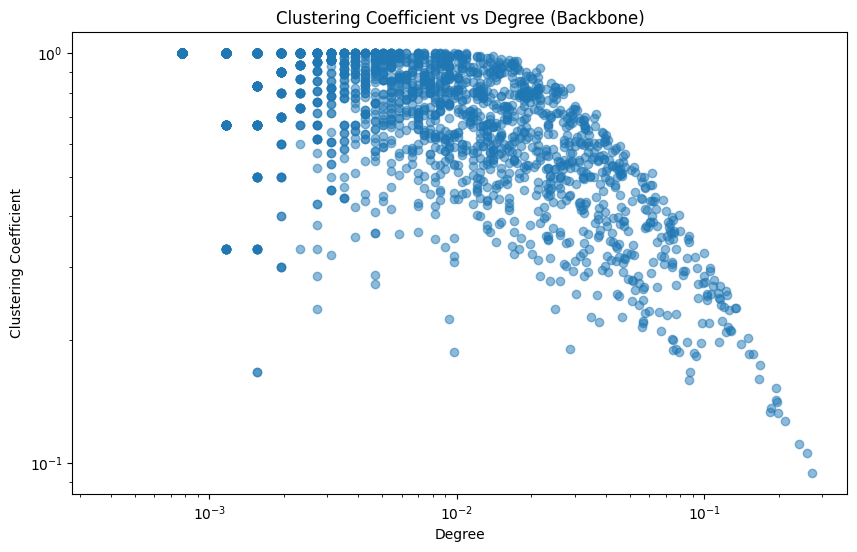

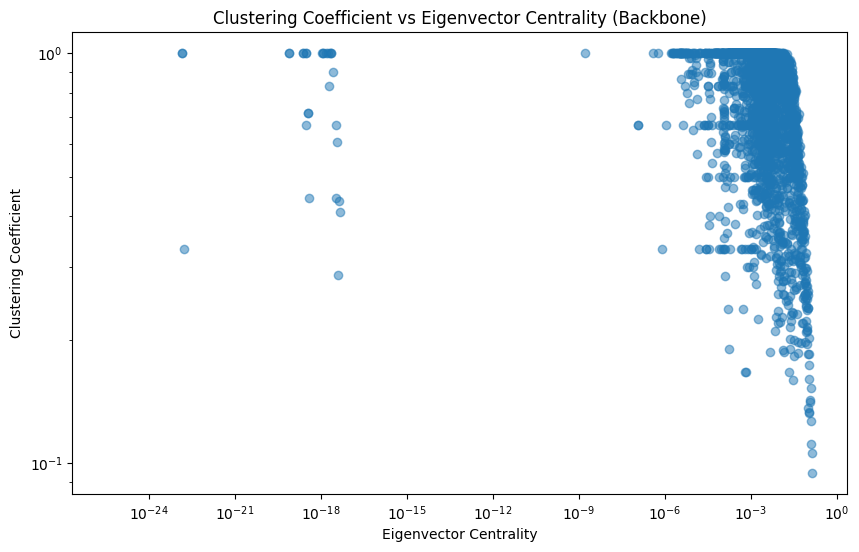

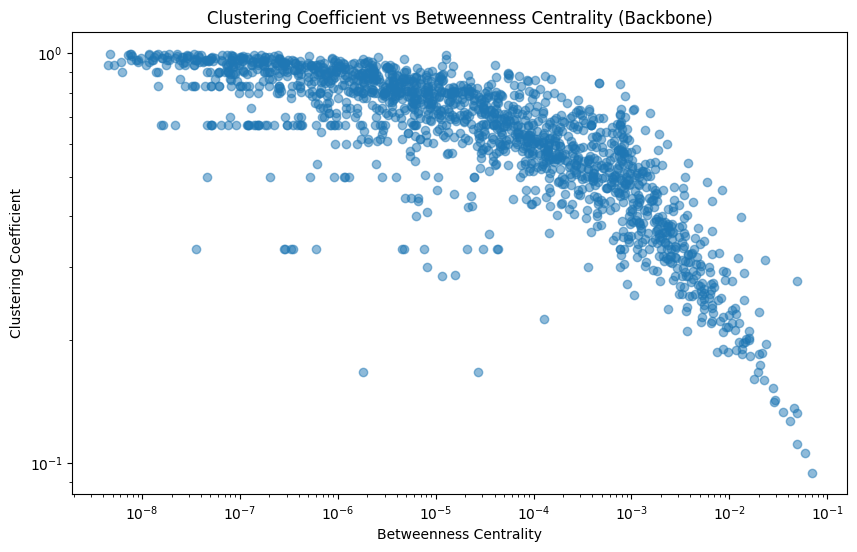

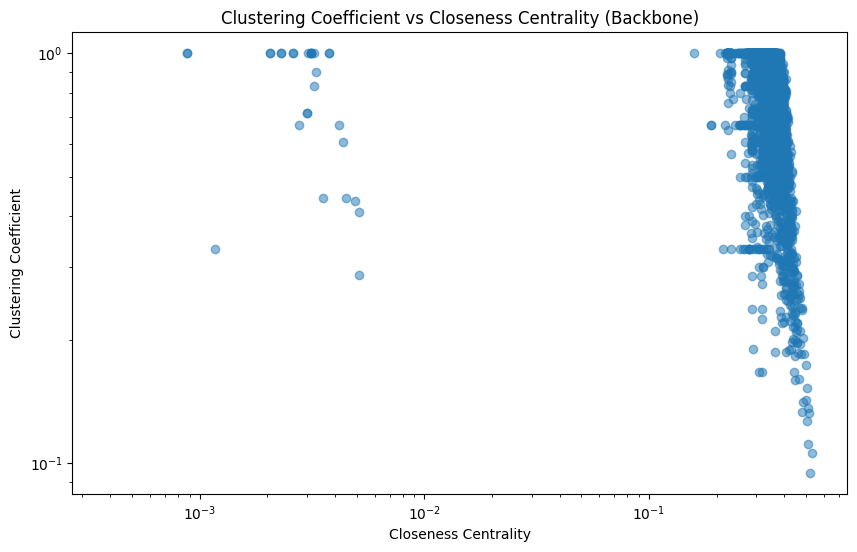

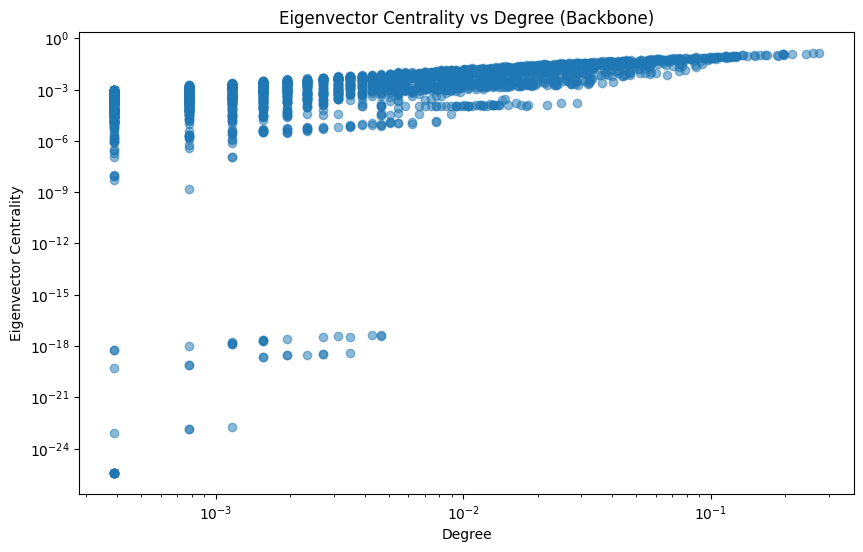

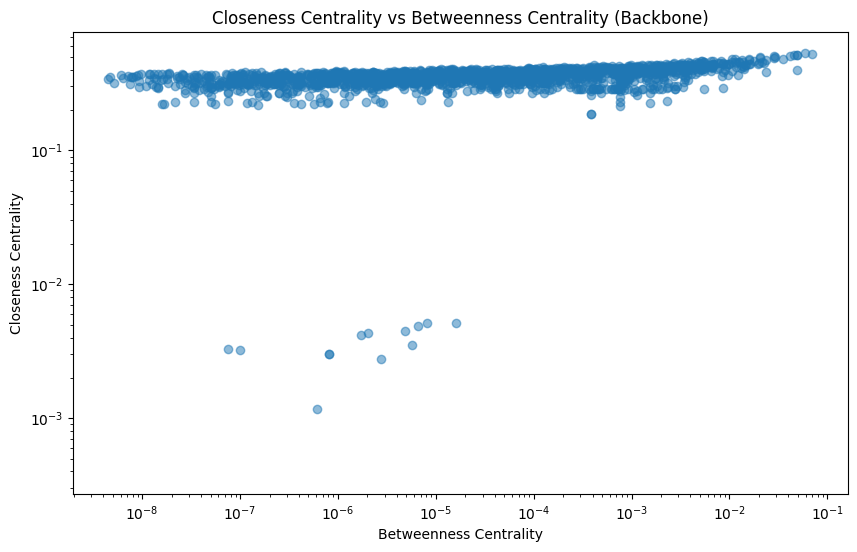

In [ ]:

degree_values = degree_centrality.values()
clustering_values = clustering_coeffs.values()
eigen_values = eigen_centrality.values()
betweenness_values = betweenness_centrality.values()
closeness_values = closeness_centrality.values()

# plot all combinations of centrality vs clustering coefficient

# degree vs clustering
plt.figure(figsize=(10, 6))
plt.scatter(degree_values, clustering_values, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title("Clustering Coefficient vs Degree (Backbone)")
plt.xlabel("Degree")
plt.ylabel("Clustering Coefficient")
plt.show()

# eigenvector vs clustering
plt.figure(figsize=(10, 6))
plt.scatter(eigen_values, clustering_values, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title("Clustering Coefficient vs Eigenvector Centrality (Backbone)")
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Clustering Coefficient")
plt.show()

# betweenness vs clustering
plt.figure(figsize=(10, 6))
plt.scatter(betweenness_values, clustering_values, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title("Clustering Coefficient vs Betweenness Centrality (Backbone)")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Clustering Coefficient")
plt.show()

# closeness vs clustering
plt.figure(figsize=(10, 6))
plt.scatter(closeness_values, clustering_values, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title("Clustering Coefficient vs Closeness Centrality (Backbone)")
plt.xlabel("Closeness Centrality")
plt.ylabel("Clustering Coefficient")
plt.show()

# centrality measures plotted against each other
# degree vs eigenvector
plt.figure(figsize=(10, 6))
plt.scatter(degree_values, eigen_values, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title("Eigenvector Centrality vs Degree (Backbone)")
plt.xlabel("Degree")
plt.ylabel("Eigenvector Centrality")
plt.show()

# betweenness vs closeness
plt.figure(figsize=(10, 6))
plt.scatter(betweenness_values, closeness_values, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title("Closeness Centrality vs Betweenness Centrality (Backbone)")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Closeness Centrality")
plt.show()





### Graph med lyrics

In [6]:
# load graph 
path_to_graph = Path(r"/Users/iben/Desktop/Social_graphs/artist_network.graphml")

G_lyrics = nx.read_graphml(path_to_graph)

# number of nodes and edges
print(f"Graph has {G_lyrics.number_of_nodes()} nodes and {G_lyrics.number_of_edges()} edges.")



Graph has 4432 nodes and 209375 edges.


### Noise corrected backbone

In [7]:

import networkx as nx
import math
from scipy.stats import poisson

from joblib import Parallel, delayed

def noise_corrected_backbone_fast(G, alpha=0.05, n_jobs=-1, weight='weight'):
    """
    Compute Noise-Corrected Backbone using parallel processing and scipy.
    
    Parameters:
    -----------
    G : networkx.Graph
        Weighted graph (edges must have 'weight' attribute).
    alpha : float
        Significance level for edge retention.
    n_jobs : int
        Number of parallel jobs (-1 = all cores).
    weight : str
        Edge attribute to use as weight.
    
    Returns:
    --------
    backbone : networkx.Graph
        Backbone graph with significant edges only.
    """
    backbone = nx.Graph()
    backbone.add_nodes_from(G.nodes(data=True))

    # Precompute node strengths and total weight
    strength = {node: sum(data[weight] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}
    total_weight = G.size(weight=weight)

    edges = list(G.edges(data=True))

    def process_edge(u, v, data):
        w = data[weight]
        expected = (strength[u] * strength[v]) / (2 * total_weight)
        if expected > 0:
            p_value = poisson.sf(w - 1, expected)  # Survival function
        else:
            p_value = 0.0
        return (u, v, w) if p_value < alpha else None

    # Parallel processing
    results = Parallel(n_jobs=n_jobs, backend="loky")(
        delayed(process_edge)(u, v, data) for u, v, data in edges)

    # Add significant edges
    for res in results:
        if res:
            u, v, w = res
            backbone.add_edge(u, v, weight=w)
            
            # add all attributes of the nodes to the backbone
            for attr, value in G.nodes[u].items():
                backbone.nodes[u][attr] = value
            for attr, value in G.nodes[v].items():
                backbone.nodes[v][attr] = value
            # add all attributes of the edge to the backbone
            for attr, value in G[u][v].items():
                backbone[u][v][attr] = value
            
    return backbone


# Example usage:
backbone_noise_cor = noise_corrected_backbone_fast(G_lyrics, alpha=0.01)
gcc_noise_cor = max(nx.connected_components(backbone_noise_cor), key=len)
gcc_subgraph = backbone_noise_cor.subgraph(gcc_noise_cor).copy()

# number of nodes and edges in backbone
print(f"Backbone has {gcc_subgraph.number_of_nodes()} nodes and {gcc_subgraph.number_of_edges()} edges.")


Backbone has 4029 nodes and 40488 edges.


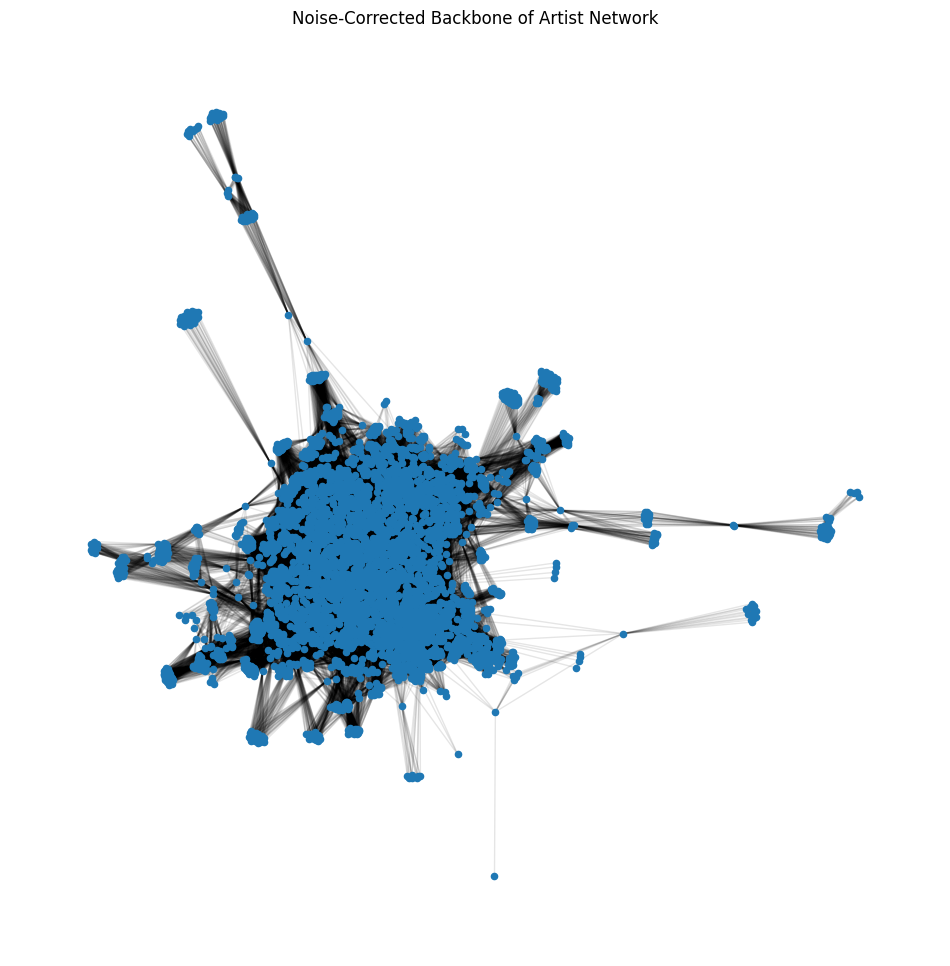

In [59]:
# plot 
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(gcc_subgraph, k=0.1)  # positions for all nodes
nx.draw_networkx_nodes(gcc_subgraph, pos, node_size=20)
nx.draw_networkx_edges(gcc_subgraph, pos, alpha=0.1)
plt.title("Noise-Corrected Backbone of Artist Network")
plt.axis('off')
plt.show()


In [60]:
# print attribute name of nodes and edges 
print("Node attributes:", list(G_lyrics.nodes(data=True))[0][1].keys())
print("Edge attributes:", list(G_lyrics.edges(data=True))[0][2].keys())

Node attributes: dict_keys(['songs', 'albums', 'playlists', 'num_playlists', 'num_songs', 'avg_song_duration', 'lyrics'])
Edge attributes: dict_keys(['shared_playlists', 'weight', 'co_occurrence_count'])


Backbone has 859 nodes and 7376 edges.


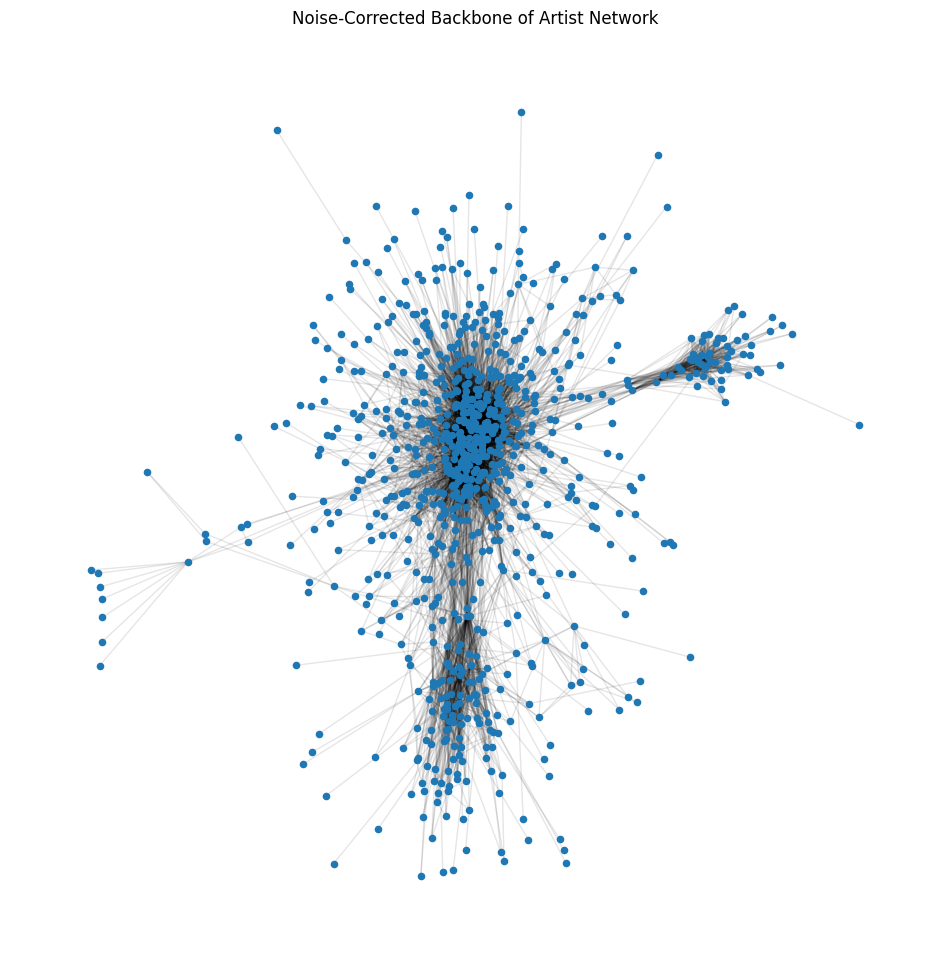

In [72]:
backbone_disp = disparity_filter(G_lyrics, alpha=0.1, weight='weight')
gcc_disp = max(nx.connected_components(backbone_disp), key=len)
subgraph_disp = backbone_disp.subgraph(gcc_disp).copy()

# print nodes and edges of the backbone
print(f"Backbone has {backbone_disp.number_of_nodes()} nodes and {backbone_disp.number_of_edges()} edges.")

# plot the backbone network
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph_disp, k=0.1)  # positions for all
nx.draw_networkx_nodes(subgraph_disp, pos, node_size=20)
nx.draw_networkx_edges(subgraph_disp, pos, alpha=0.1)
plt.title("Noise-Corrected Backbone of Artist Network")
plt.axis('off')
plt.show()

### Louvain communities on noise corrected backbone

In [63]:
louvain_communities = list(nx.community.louvain_communities(gcc_subgraph, seed=11))
louvain_modularity = nx.community.modularity(gcc_subgraph, louvain_communities)

# visualize the network using the Force Atlas algorithm with communities colored differently
# using louvain_communities
partition = {}
for i, community in enumerate(louvain_communities):
    for node in community:
        partition[node] = i

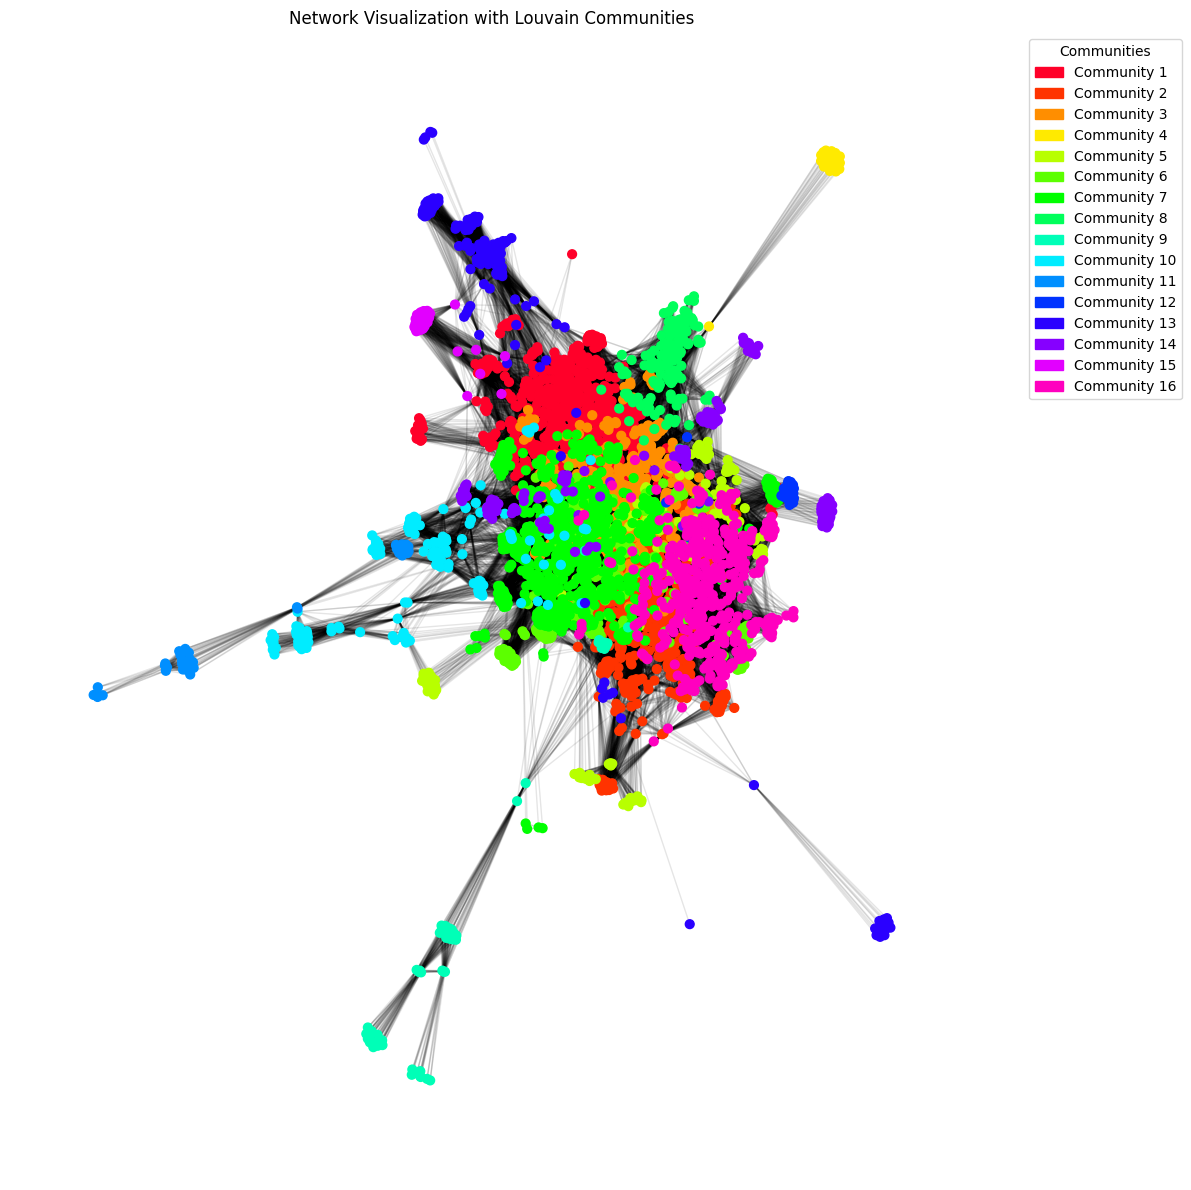


Louvain method found 16 communities with a modularity of 0.6526.


In [64]:

# Set the size of the plot
plt.figure(figsize=(12, 12))
# Compute the layout using spring layout (Force Atlas-like)
pos = nx.spring_layout(gcc_subgraph, seed=42)
# Draw nodes with colors based on their community
cmap = plt.get_cmap('gist_rainbow', max(partition.values()) + 1)
nx.draw_networkx_nodes(gcc_subgraph, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
# Draw edges
nx.draw_networkx_edges(gcc_subgraph, pos, alpha=0.1)
# We will create custom legend handles because networkx doesn't do it automatically
legend_handles = []
for i in range(len(louvain_communities)):
    legend_handles.append(Patch(color=cmap(i), label=f'Community {i+1}'))

plt.legend(handles=legend_handles, title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Network Visualization with Louvain Communities")
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"\nLouvain method found {len(louvain_communities)} communities with a modularity of {louvain_modularity:.4f}.")


### Louvain communities on disparity filter backbone


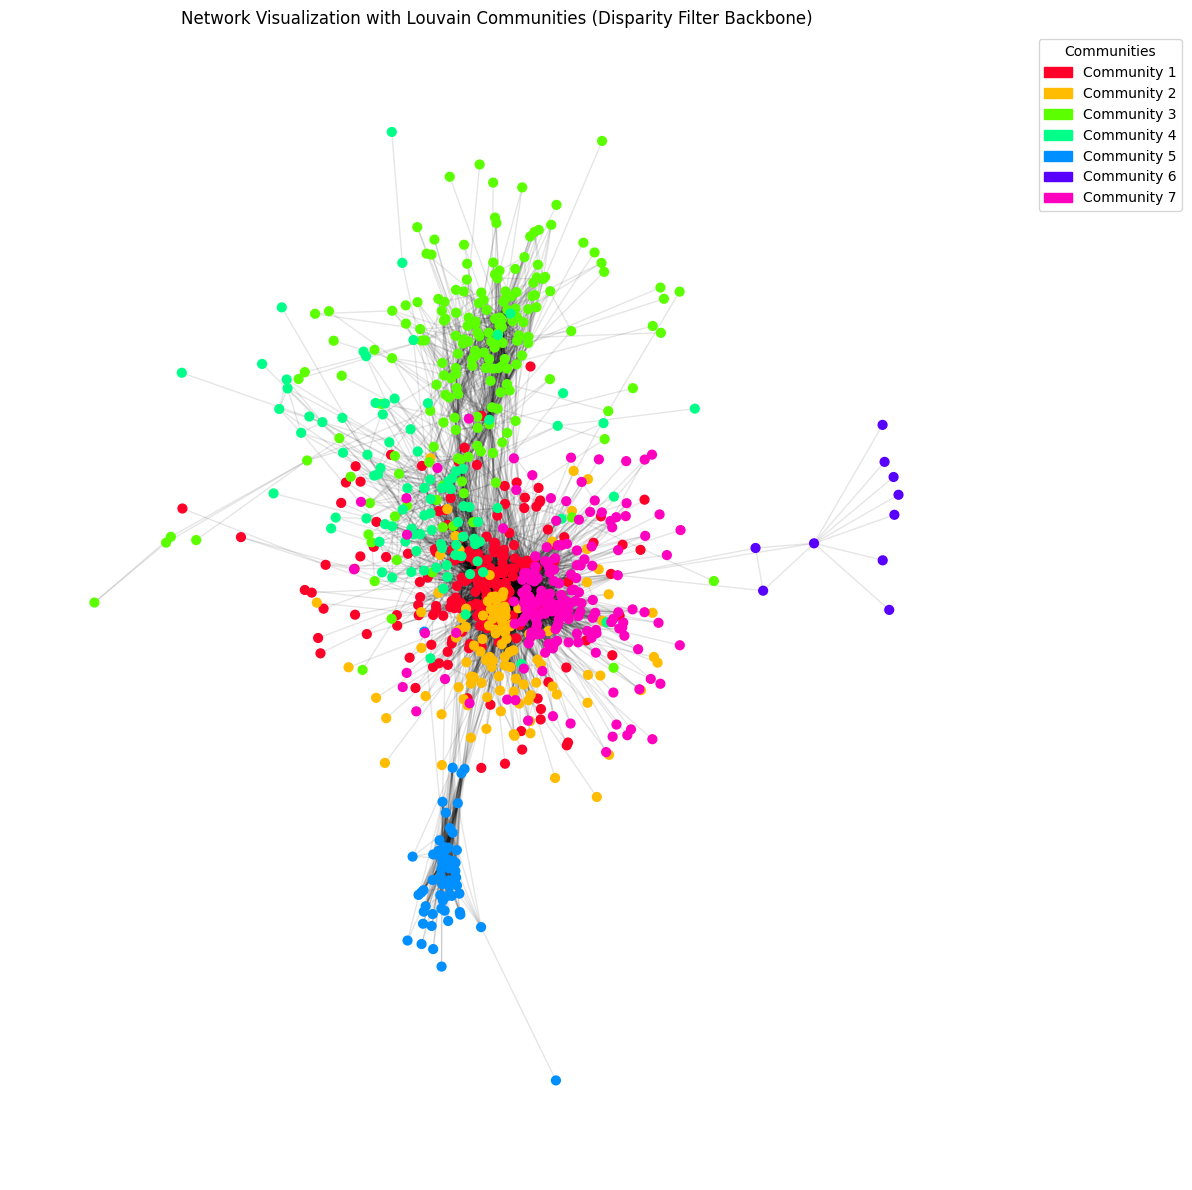

In [71]:
# louvain communities on disparity filter backbone

louvain_communities = list(nx.community.louvain_communities(subgraph_disp, seed=11))
louvain_modularity = nx.community.modularity(subgraph_disp, louvain_communities)

# visualize the network using the Force Atlas algorithm with communities colored differently
# using louvain_communities
partition = {}
for i, community in enumerate(louvain_communities):
    for node in community:
        partition[node] = i

# Set the size of the plot
plt.figure(figsize=(12, 12))
# Compute the layout using spring layout (Force Atlas-like)
pos = nx.spring_layout(subgraph_disp, seed=42)
# Draw nodes with colors based on their community
cmap = plt.get_cmap('gist_rainbow', max(partition.values()) + 1)
nx.draw_networkx_nodes(subgraph_disp, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
# Draw edges
nx.draw_networkx_edges(subgraph_disp, pos, alpha=0.1)
# We will create custom legend handles because networkx doesn't do it automatically
legend_handles = []
for i in range(len(louvain_communities)):
    legend_handles.append(Patch(color=cmap(i), label=f'Community {i+1}'))
plt.legend(handles=legend_handles, title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Network Visualization with Louvain Communities (Disparity Filter Backbone)")
plt.axis('off')
plt.tight_layout()
plt.show()



In [10]:

import networkx as nx
import pandas as pd

def export_graph_for_backbone(G, filename, weight_column_name="weight", sep="\t"):
    """
    Export a NetworkX graph to a file compatible with the backbone 'read()' function.
    
    Parameters:
    -----------
    G : networkx.Graph
        Weighted graph (edges must have 'weight' attribute).
    filename : str
        Output file path.
    weight_column_name : str
        Name of the weight column in the output file (default: 'weight').
    sep : str
        Separator for the file (default: tab).
    """
    # Extract edges with weights
    edges_data = [(u, v, data.get('weight', 1.0)) for u, v, data in G.edges(data=True)]
    
    # Create DataFrame
    df = pd.DataFrame(edges_data, columns=["src", "trg", weight_column_name])
    
    # Save to file
    df.to_csv(filename, sep=sep, index=False)
    print(f"Graph exported to {filename} with columns: src, trg, {weight_column_name}")

# Example usage:
# export_graph_for_backbone(G, "spotify_network.tsv", weight_column_name="nij")


In [35]:
# count selfloops in G_lyrics
selfloops = list(nx.selfloop_edges(G_lyrics))
print(f"Number of self-loops in G_lyrics: {len(selfloops)}")

# count nodes with same src and trg
same_src_trg = 0
for u, v in G_lyrics.edges():
    if u == v:
        same_src_trg += 1
print(f"Number of edges with same src and trg in G_lyrics: {same_src_trg}") 

Number of self-loops in G_lyrics: 0
Number of edges with same src and trg in G_lyrics: 0


In [ ]:
# remove selfloops
G_lyrics.remove_edges_from(nx.selfloop_edges(G_lyrics))

In [29]:
# include functions of backboning.py
import backboning

export_graph_for_backbone(G_lyrics, "spotify_network.tsv", weight_column_name="nij")


Graph exported to spotify_network.tsv with columns: src, trg, nij


In [43]:
# org. Graph has 4432 nodes and 209375 edges.
table, original_nodes, original_edges = backboning.read("spotify_network.tsv","nij")

# same src and trg in table
same_src_trg_table = 0
for i in range(len(table)):
    # if src == trg
    if table.iloc[i]["src"] == table.iloc[i]["trg"]:
        same_src_trg_table += 1
print(f"Number of edges with same src and trg in table: {same_src_trg_table}")


Number of edges with same src and trg in table: 0


In [40]:
NC_table = backboning.noise_corrected(table)
NC_backbone = backboning.thresholding(NC_table, 0.05)
print(NC_backbone)

Calculating NC score...


                  src               trg  nij     score
0       Missy_Elliott     Avril_Lavigne    2  0.971639
1       Missy_Elliott  Bowling_For_Soup    1  0.942199
2       Missy_Elliott   Boys_Like_Girls    1  0.945948
3       Missy_Elliott    Britney_Spears    3  0.998018
4       Missy_Elliott           Cascada    1  0.949712
...               ...               ...  ...       ...
209370   Yann_Tiersen             Jon_D    1  0.999256
209371   Yann_Tiersen         Jon_Jason    1  0.999211
209372          Jon_D         Big_Words    1  0.999489
209373          Jon_D         Jon_Jason    1  0.999474
209374      Big_Words         Jon_Jason    1  0.999737

[206728 rows x 4 columns]


In [37]:
# Minimum score for NC_backbone
print(NC_backbone.min())

src      101_Strings_Orchestra
trg      101_Strings_Orchestra
nij                          1
score                 0.012862
dtype: object


In [26]:
print(NC_backbone)

                  src               trg  nij     score
0       Missy_Elliott     Avril_Lavigne    2  0.971639
1       Missy_Elliott  Bowling_For_Soup    1  0.942199
2       Missy_Elliott   Boys_Like_Girls    1  0.945948
3       Missy_Elliott    Britney_Spears    3  0.998018
4       Missy_Elliott           Cascada    1  0.949712
...               ...               ...  ...       ...
209370   Yann_Tiersen             Jon_D    1  0.999256
209371   Yann_Tiersen         Jon_Jason    1  0.999211
209372          Jon_D         Big_Words    1  0.999489
209373          Jon_D         Jon_Jason    1  0.999474
209374      Big_Words         Jon_Jason    1  0.999737

[206728 rows x 4 columns]
